### Importing Important Libs and packages

In [1]:
# Enables automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))
import pandas as pd

In [5]:
#Importing necessary modules for sentiment analysis
from scripts.sentiment_analysis import (headline_length_stats, article_count_by_publisher 
                                        ,analyze_publication_trends, generate_wordcloud
                                        ,extract_keywords_and_matches, analyze_publication_frequency
                                        ,analyze_hourly_distribution,analyze_publishers
                                        ,extract_email_domains)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ssss\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ssss\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ssss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
# Loading the raw analyst ratings data
df =pd.read_csv('../data/raw_analyst_ratings.csv')

In [13]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


### 1. Descriptive Statistics

In [22]:
# 🟢 Step 2: Headline Length Stats
headline_length_stats(df, text_col='headline')


--- Headline Length Stats ---
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87
...,...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX,38
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX,52
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX,56
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX,54



--- Top Publishers by Article Count ---
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


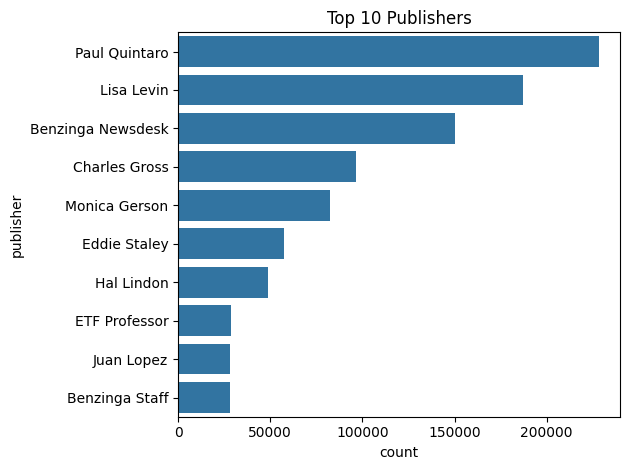

In [23]:

# Count articles per publisher to identify the most active publishers.
article_count_by_publisher(df, publisher_col='publisher')  


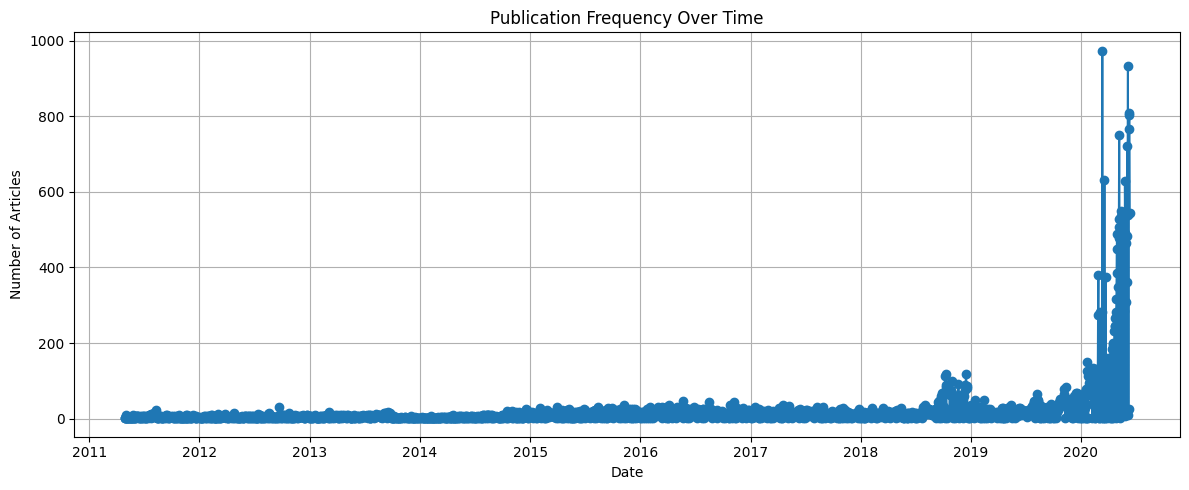

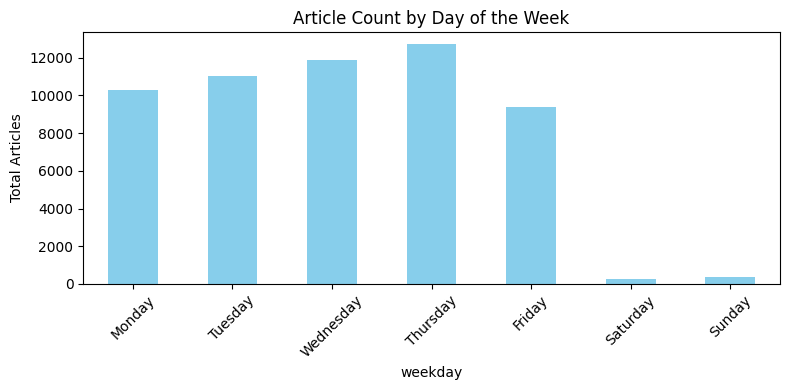

(         Unnamed: 0                                           headline  \
 0                 0            Stocks That Hit 52-Week Highs On Friday   
 1                 1         Stocks That Hit 52-Week Highs On Wednesday   
 2                 2                      71 Biggest Movers From Friday   
 3                 3       46 Stocks Moving In Friday's Mid-Day Session   
 4                 4  B of A Securities Maintains Neutral on Agilent...   
 ...             ...                                                ...   
 1407266     1413787  Chinese Nano-Cap Momentum Stocks Sharply Highe...   
 1407267     1413788  28 Stocks Moving In Wednesday's Pre-Market Ses...   
 1407268     1413789  China Zenix Auto International Reports Q3 EPAD...   
 1407269     1413790                   46 Biggest Movers From Yesterday   
 1407270     1413791      42 Stocks Moving In Tuesday's Mid-Day Session   
 
                                                        url          publisher  \
 0        https:

In [24]:
analyze_publication_trends(df, date_col='date')


### 2. Text Analysis / Topic Modeling

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ssss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ssss\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ssss\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ssss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


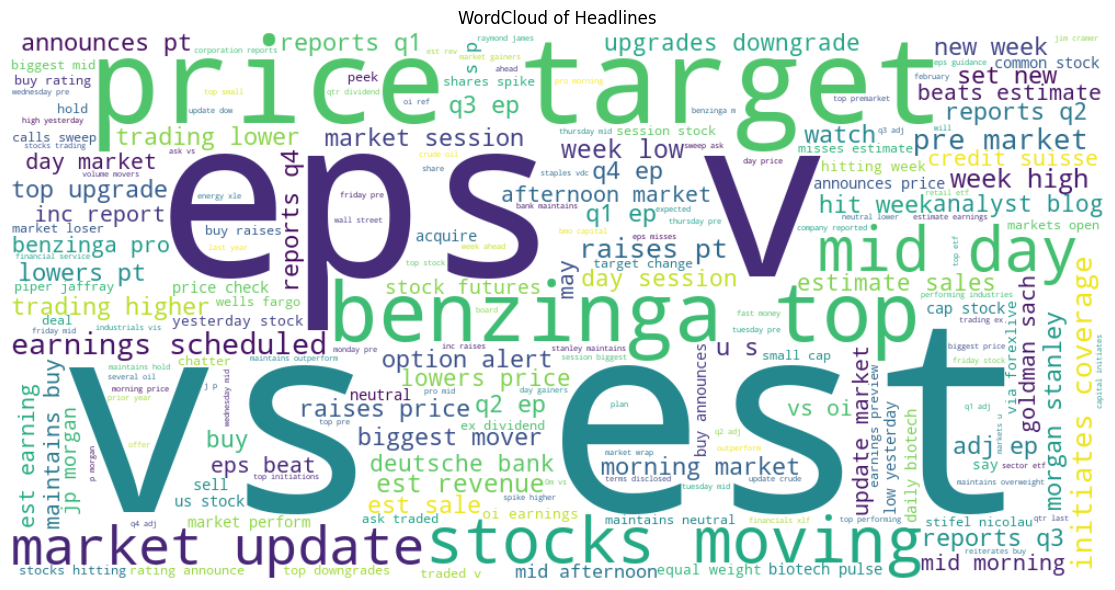

In [19]:
generate_wordcloud(df, text_col='headline')

In [25]:
import nltk

# Try to find the 'punkt' tokenizer
try:
    nltk.data.find('tokenizers/punkt')
    print("✅ 'punkt' is installed.")
except LookupError:
    print("❌ 'punkt' is NOT installed.")


✅ 'punkt' is installed.


In [11]:
#extract_common_keywords(df, text_col='headline',top_n=100)
import warnings
warnings.filterwarnings("ignore", message="Glyph .* missing from font.*")

### 3. Time Series Analysis

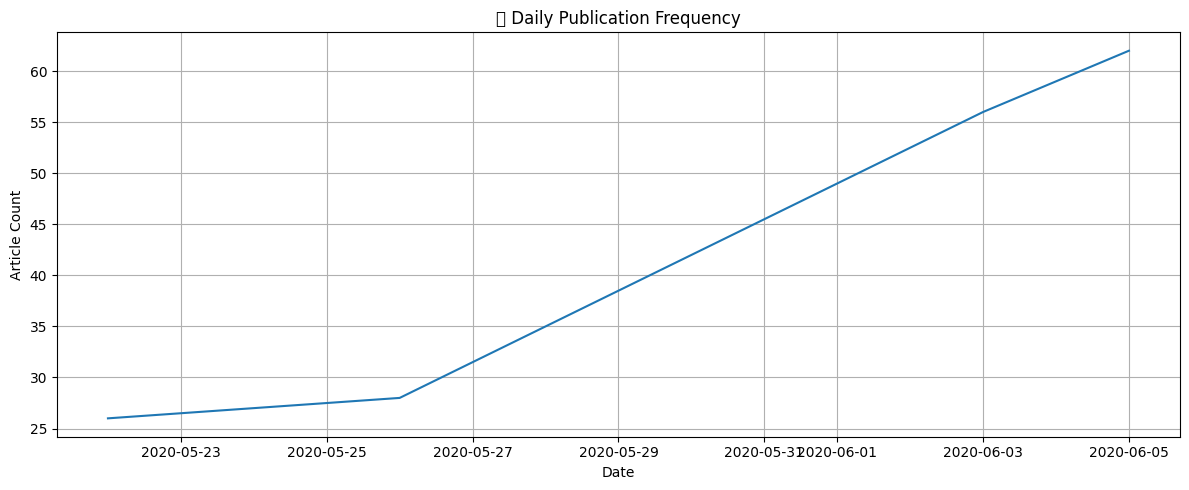

In [12]:
# Run time series analysis
spike_days = analyze_publication_frequency(df)

c:\Users\ssss\Desktop\## 10 Acadamy\Week1-financial-news-sentiment-analysis\financial-news-sentiment-analysis\scripts\sentiment_analysis.py:189: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hour', palette='coolwarm')


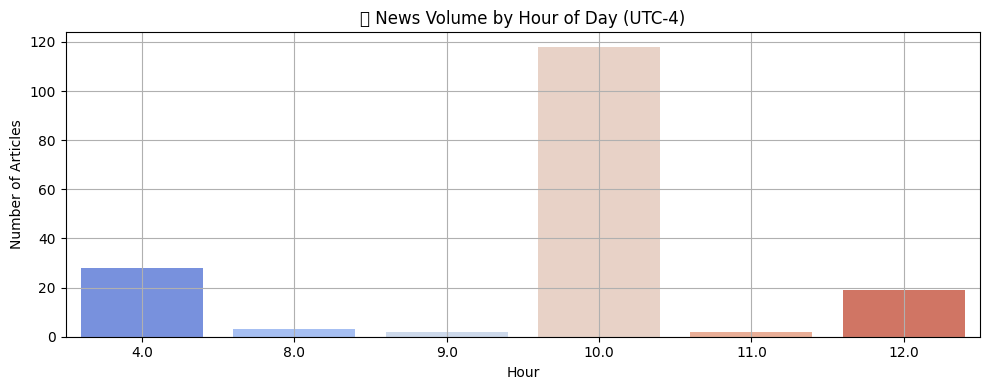

,hour
0,10.0
1,10.0
2,4.0
3,12.0
4,11.0
...,...
1407323,NaN
1407324,NaN
1407325,NaN
1407326,NaN


In [ ]:
# Run time series hourly

analyze_hourly_distribution(df)


### 4. Publisher Analysis

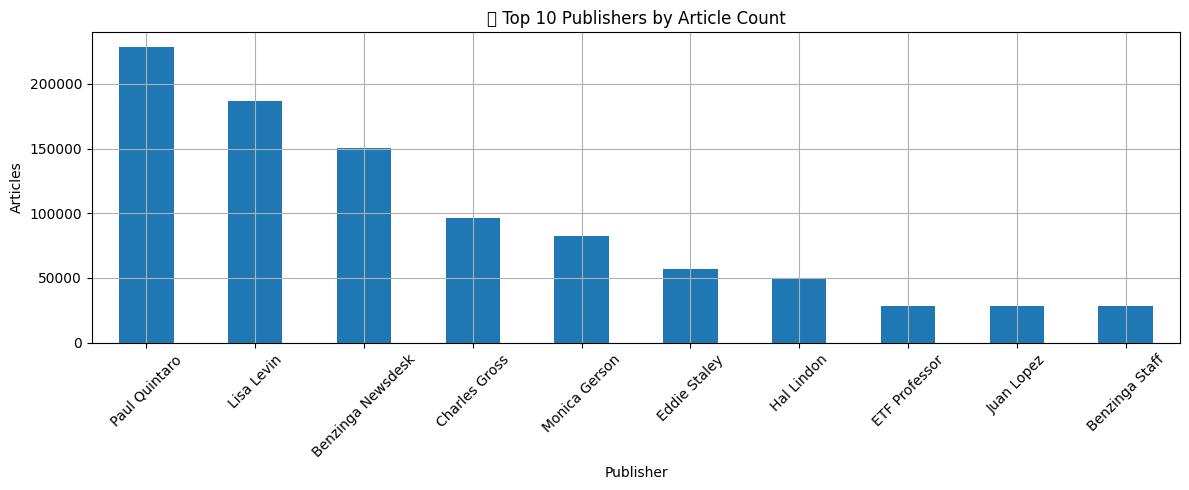

In [15]:
# Publisher insights
top_publishers = analyze_publishers(df)

In [16]:
# Extract email domains from the publisher column
publisher_domains = extract_email_domains(df)

📧 Most common email domains in publishers:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


c:\Users\ssss\Desktop\## 10 Acadamy\Week1-financial-news-sentiment-analysis\financial-news-sentiment-analysis\scripts\sentiment_analysis.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_publishers['domain'] = email_publishers[publisher_col].apply(lambda x: re.findall(r'@([\w\.-]+)', x)[0] if '@' in x else None)
